<a href="https://colab.research.google.com/github/Elish-Ab/AI_Mastery_10x_Week6/blob/main/notebooks/Task_3_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
!pip install sidetable
import sidetable

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
df = pd.read_csv('data.csv')

droping value columns

In [68]:
df.drop(columns=['Value'], axis= 1,inplace=True)

In [69]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  TransactionStartTime  95662 non-null  object 
 13  PricingStrategy       95662 non-null  int64  
 14  FraudResult           95662 non-null  int64  
dtypes: float64(1), int6

Sum of all transaction amounts for each customer.

In [71]:
df.groupby('CustomerId').Amount.sum().sort_values(ascending=False)

,Amount
CustomerId,
CustomerId_909,83451240.0
CustomerId_1535,60212748.0
CustomerId_4878,50804960.0
CustomerId_5155,29726020.0
CustomerId_4453,29294460.0
...,...
CustomerId_7429,-520000.0
CustomerId_7401,-600000.0
CustomerId_7339,-1700000.0


Average transaction amount per customer

In [72]:
df.groupby('CustomerId').Amount.mean().sort_values(ascending=False)

,Amount
CustomerId,
CustomerId_1535,8.601821e+06
CustomerId_1353,2.000000e+06
CustomerId_3956,2.000000e+06
CustomerId_1122,1.850000e+06
CustomerId_1850,1.509988e+06
...,...
CustomerId_7423,-2.000000e+05
CustomerId_7429,-2.600000e+05
CustomerId_7401,-3.000000e+05


Number of transactions per customer.

In [73]:
df.groupby('CustomerId').TransactionId.count().sort_values(ascending=False)

,TransactionId
CustomerId,
CustomerId_7343,4091
CustomerId_3634,2085
CustomerId_647,1869
CustomerId_1096,784
CustomerId_4033,778
...,...
CustomerId_3231,1
CustomerId_322,1
CustomerId_3214,1


Variability of transaction amounts per customer.

In [74]:
df.groupby('CustomerId').Amount.std().sort_values(ascending=False)

,Amount
CustomerId,
CustomerId_1535,3.309916e+06
CustomerId_4925,2.132209e+06
CustomerId_2303,1.896618e+06
CustomerId_2292,1.542946e+06
CustomerId_909,1.297279e+06
...,...
CustomerId_961,NaN
CustomerId_967,NaN
CustomerId_975,NaN


In [75]:
import datetime as dt

In [76]:
dt = pd.to_datetime(df['TransactionStartTime']).dt

Extract Features

In [77]:
df['year'] = dt.year
df['month'] = dt.month
df['day'] = dt.day
df['hour'] = dt.hour

Encoding catergorical data

In [78]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the ProductCategory column
df['ProductCategory_encoded'] = label_encoder.fit_transform(df['ProductCategory'])

In [79]:
# Check if the columns are present before dropping them
print(df.columns)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'TransactionStartTime', 'PricingStrategy', 'FraudResult', 'year', 'month', 'day', 'hour', 'ProductCategory_encoded'], dtype='object')


In [80]:
# Drop the columns
df = df.drop(['CurrencyCode', 'TransactionStartTime', 'CountryCode'], axis=1)

In [81]:
# Convert to string if it's not already a string
df['TransactionId'] = df['TransactionId'].astype(str)
df['BatchId'] = df['BatchId'].astype(str)
df['AccountId'] = df['AccountId'].astype(str)
df['SubscriptionId'] = df['SubscriptionId'].astype(str)
df['CustomerId'] = df['CustomerId'].astype(str)
df['ProviderId'] = df['ProviderId'].astype(str)
df['ProductId'] = df['ProductId'].astype(str)
df['ChannelId'] = df['ChannelId'].astype(str)

In [82]:
df['Amount'].fillna(df['Amount'].mean(), inplace=True)
df['PricingStrategy'].fillna(df['PricingStrategy'].mode()[0], inplace=True)
df['hour'].fillna(df['hour'].mode()[0], inplace=True)
df['day'].fillna(df['day'].mode()[0], inplace=True)
df['month'].fillna(df['month'].mode()[0], inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)
df['FraudResult'].fillna(df['FraudResult'].mode()[0], inplace=True)

In [83]:
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
Amount,0,95662,0.0
hour,0,95662,0.0
day,0,95662,0.0
month,0,95662,0.0
year,0,95662,0.0
FraudResult,0,95662,0.0
PricingStrategy,0,95662,0.0
ChannelId,0,95662,0.0
BatchId,0,95662,0.0


In [84]:
# Extract numeric part from TransactionId
# Now extract the numeric part and convert it to an integer
df['TransactionId'] = df['TransactionId'].str.extract('(\d+)').astype(int)
df['BatchId'] = df['BatchId'].str.extract('(\d+)').astype(int)
df['AccountId'] = df['AccountId'].str.extract('(\d+)').astype(int)
df['SubscriptionId'] = df['SubscriptionId'].str.extract('(\d+)').astype(int)
df['CustomerId'] = df['CustomerId'].str.extract('(\d+)').astype(int)
df['ProviderId'] = df['ProviderId'].str.extract('(\d+)').astype(int)
df['ProductId'] = df['ProductId'].str.extract('(\d+)').astype(int)
df['ChannelId'] = df['ChannelId'].str.extract('(\d+)')

In [85]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,PricingStrategy,FraudResult,year,month,day,hour,ProductCategory_encoded
0,76871,36123,3957,887,4406,6,10,airtime,3,1000.0,2,0,2018,11,15,2,0
1,73770,15642,4841,3829,4406,4,6,financial_services,2,-20.0,2,0,2018,11,15,2,2
2,26203,53941,4229,222,4683,6,1,airtime,3,500.0,2,0,2018,11,15,2,0
3,380,102363,648,2185,988,1,21,utility_bill,3,20000.0,2,0,2018,11,15,3,8
4,28195,38780,4841,3829,988,4,6,financial_services,2,-644.0,2,0,2018,11,15,3,2


In [86]:
df.drop(columns=['ProductCategory'], axis= 1,inplace=True)

In [87]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,PricingStrategy,FraudResult,year,month,day,hour,ProductCategory_encoded
0,76871,36123,3957,887,4406,6,10,3,1000.0,2,0,2018,11,15,2,0
1,73770,15642,4841,3829,4406,4,6,2,-20.0,2,0,2018,11,15,2,2
2,26203,53941,4229,222,4683,6,1,3,500.0,2,0,2018,11,15,2,0
3,380,102363,648,2185,988,1,21,3,20000.0,2,0,2018,11,15,3,8
4,28195,38780,4841,3829,988,4,6,2,-644.0,2,0,2018,11,15,3,2


In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Define the features to scale
features_to_scale = ['Amount', 'year', 'month', 'day', 'hour']

# Handling negative values in Amount (if normalization is chosen)
df['Amount'] = df['Amount'].clip(lower=0)  # Clip negative values to zero

# Normalize the features
scaler_min_max = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_scale] = scaler_min_max.fit_transform(df[features_to_scale])

print("Normalized Data:")
print(df_normalized[features_to_scale])

# Standardize the features (This method can naturally handle negative values)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[features_to_scale] = scaler_standard.fit_transform(df[features_to_scale])

print("\nStandardized Data:")
print(df_standardized[features_to_scale])


Normalized Data:
         Amount  year     month       day      hour
0      0.000101   0.0  0.909091  0.466667  0.086957
1      0.000000   0.0  0.909091  0.466667  0.086957
2      0.000051   0.0  0.909091  0.466667  0.086957
3      0.002024   0.0  0.909091  0.466667  0.130435
4      0.000000   0.0  0.909091  0.466667  0.130435
...         ...   ...       ...       ...       ...
95657  0.000000   1.0  0.090909  0.400000  0.391304
95658  0.000101   1.0  0.090909  0.400000  0.391304
95659  0.000000   1.0  0.090909  0.400000  0.391304
95660  0.000304   1.0  0.090909  0.400000  0.434783
95661  0.000000   1.0  0.090909  0.400000  0.434783

[95662 rows x 5 columns]

Standardized Data:
         Amount      year     month       day      hour
0     -0.059304 -0.994246  0.848684 -0.100739 -2.155530
1     -0.067442 -0.994246  0.848684 -0.100739 -2.155530
2     -0.063373 -0.994246  0.848684 -0.100739 -2.155530
3      0.095314 -0.994246  0.848684 -0.100739 -1.949214
4     -0.067442 -0.994246  0.8486

In [89]:
# check target balance (FraudResult)
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"95,469",99.80%,"95,469",99.80%
1,1,193,0.20%,"95,662",100.00%


In [90]:
!pip install scorecardpy
!pip install monotonic-binning
import scorecardpy as sc
from monotonic_binning.monotonic_woe_binning import Binning

In [91]:
# Perform a 70 / 30 split of data
train, test = sc.split_df(df, 'FraudResult', ratio = 0.7, seed = 999).values()

In [96]:
# Ensure 'var' contains only numeric columns
var = train.select_dtypes(include=['number']).columns.tolist()  # List of numeric columns
var.remove('FraudResult')  # Remove target variable if it's still in the list

# Define the function to calculate WoE
def woe_num(x, y):
    bin_object = Binning(y, n_threshold=50, y_threshold=10, p_threshold=0.35, sign=False)
    global breaks
    breaks = {}
    for col in x:  # Iterate through numeric columns
        if train[col].dtype in ['float64', 'int64']:  # Ensure column is numeric
            if len(train[col].dropna()) > 0:  # Check if column has valid data
                bin_object.fit(train[[y, col]])
                breaks[col] = bin_object.bins[1:-1].tolist()
            else:
                print(f"Column {col} is empty. Skipping.")
        else:
            print(f"Column {col} is not numeric. Skipping.")
    return breaks

In [97]:
woe_num(var, 'FraudResult')

Column year is not numeric. Skipping.
Column month is not numeric. Skipping.
Column day is not numeric. Skipping.
Column hour is not numeric. Skipping.


{'TransactionId': [140681.0],
 'BatchId': [116594.0, 139493.0],
 'AccountId': [4841.0],
 'SubscriptionId': [2270.0, 4036.0, 4836.0],
 'CustomerId': [4877.0, 7479.0],
 'ProviderId': [6.0],
 'ProductId': [12.0, 27.0],
 'Amount': [490000.0, 9880000.0],
 'PricingStrategy': [4.0],
 'ProductCategory_encoded': [1.0, 8.0]}

In [98]:
bins_adj = sc.woebin(df, 'FraudResult', positive = '0')

[INFO] creating woe binning ...
Binning on 95662 rows and 16 columns in 00:00:17


{'CustomerId': <Figure size 640x480 with 2 Axes>,
 'PricingStrategy': <Figure size 640x480 with 2 Axes>,
 'day': <Figure size 640x480 with 2 Axes>,
 'TransactionId': <Figure size 640x480 with 2 Axes>,
 'ChannelId': <Figure size 640x480 with 2 Axes>,
 'month': <Figure size 640x480 with 2 Axes>,
 'ProviderId': <Figure size 640x480 with 2 Axes>,
 'year': <Figure size 640x480 with 2 Axes>,
 'BatchId': <Figure size 640x480 with 2 Axes>,
 'ProductCategory_encoded': <Figure size 640x480 with 2 Axes>,
 'hour': <Figure size 640x480 with 2 Axes>,
 'SubscriptionId': <Figure size 640x480 with 2 Axes>,
 'Amount': <Figure size 640x480 with 2 Axes>,
 'AccountId': <Figure size 640x480 with 2 Axes>,
 'ProductId': <Figure size 640x480 with 2 Axes>}

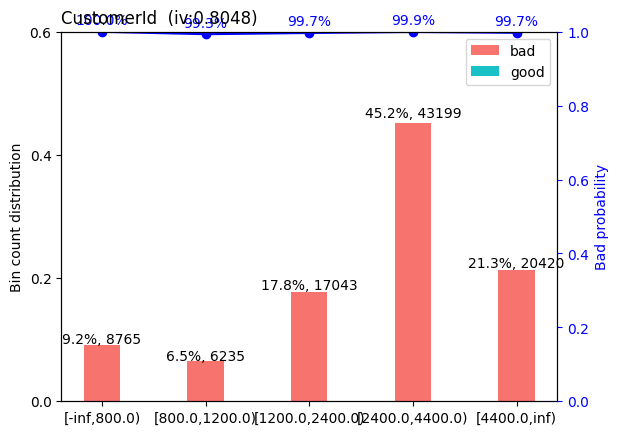

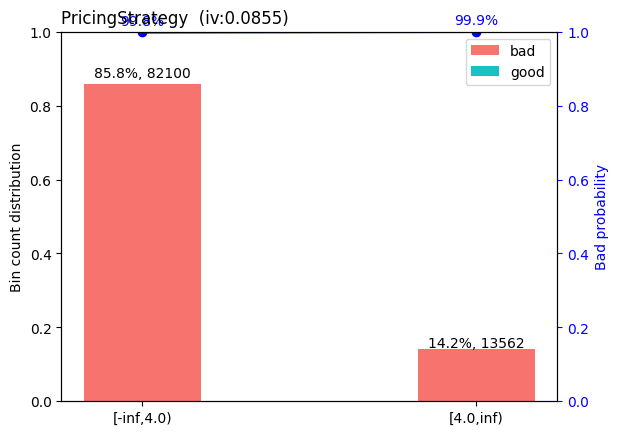

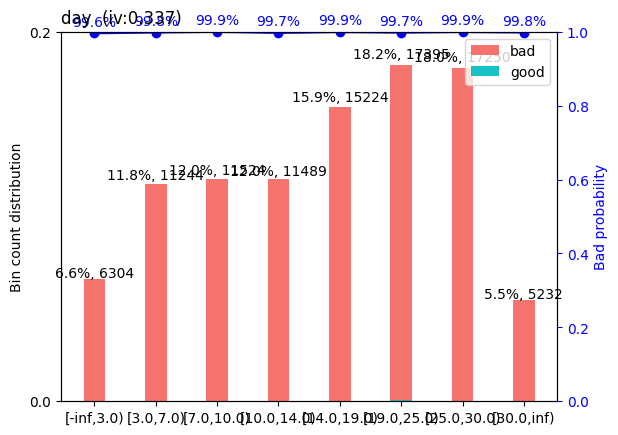

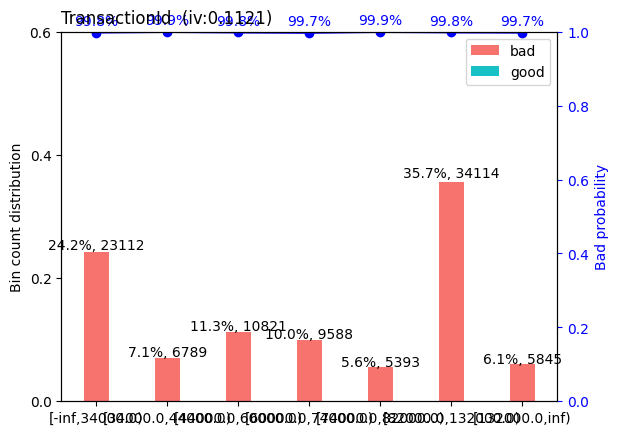

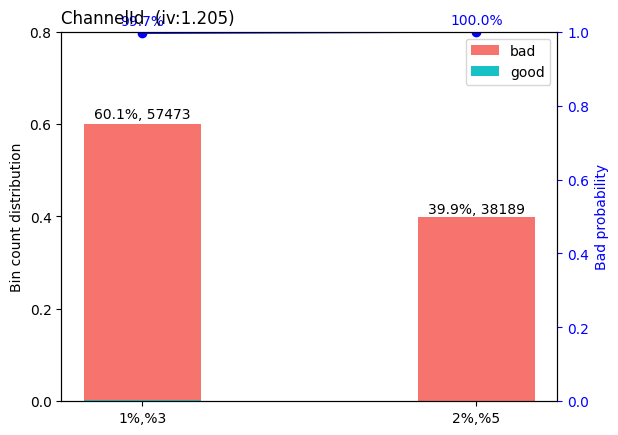

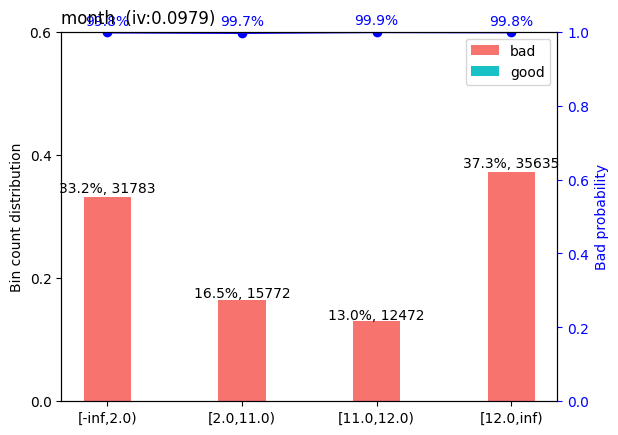

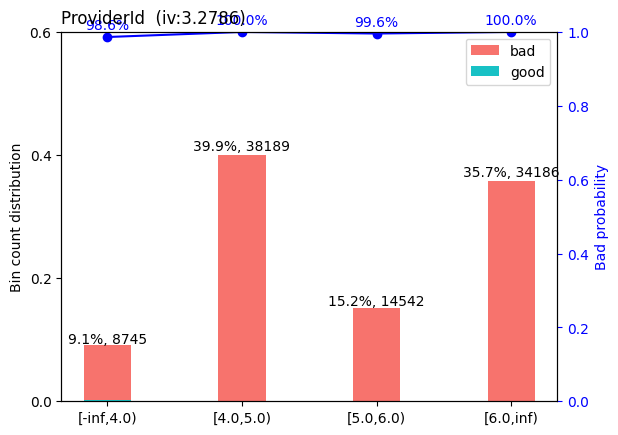

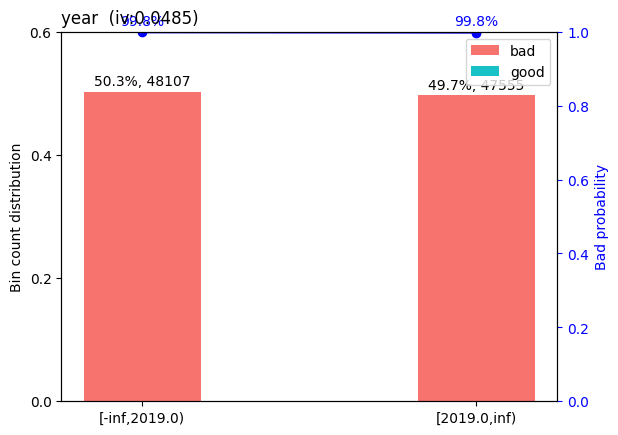

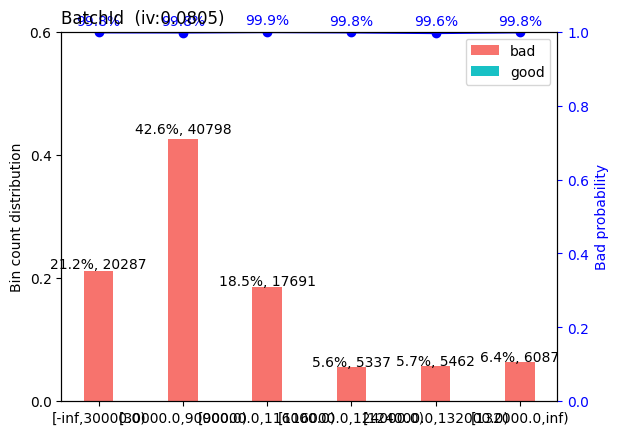

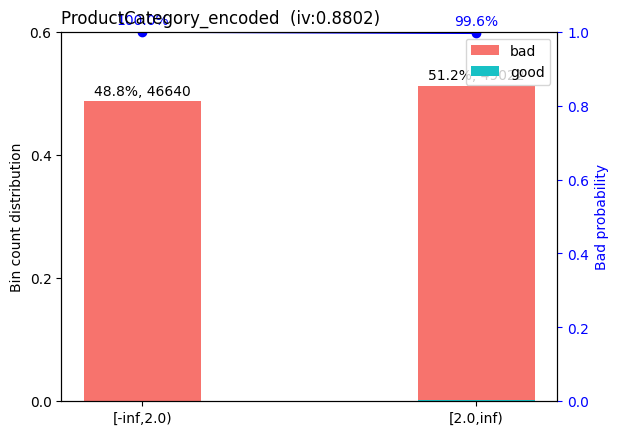

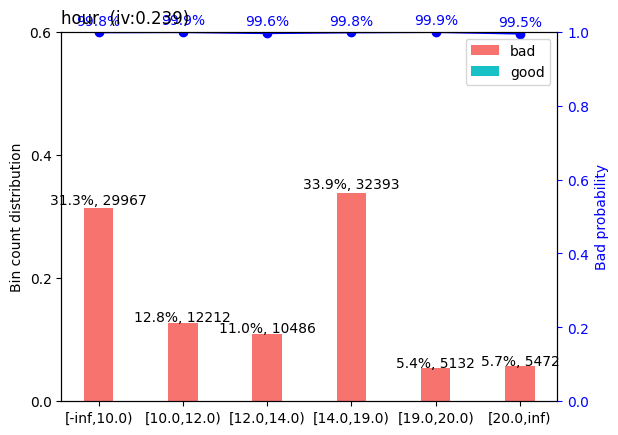

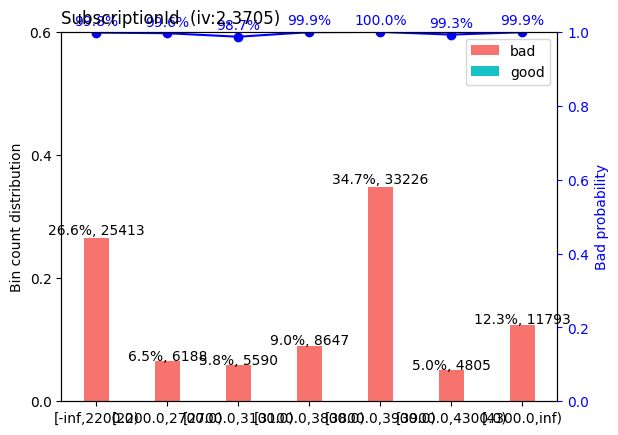

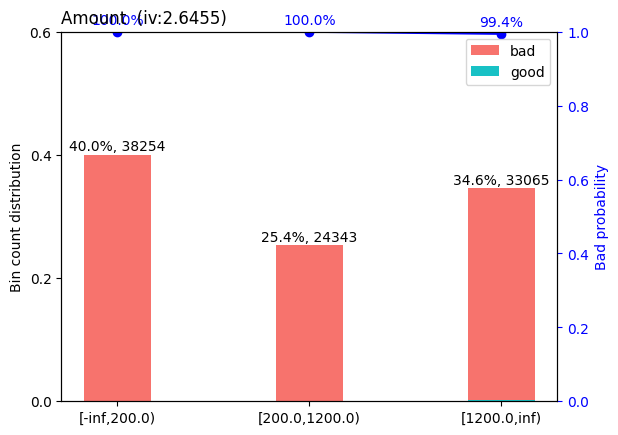

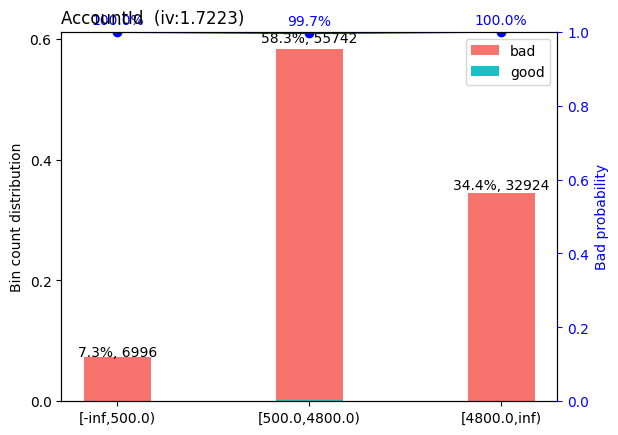

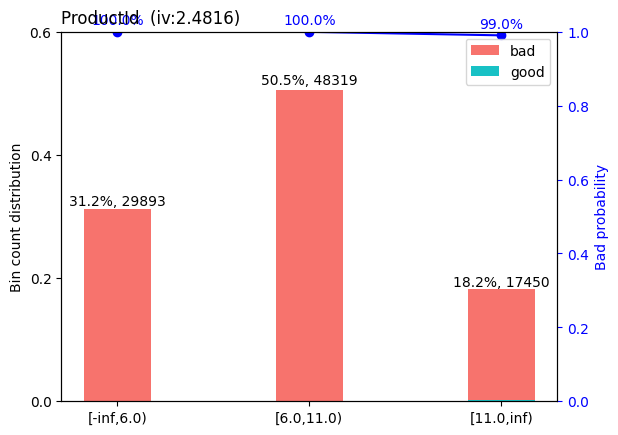

In [99]:
sc.woebin_plot(bins_adj)

In [100]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [118]:
# Merge by index
train_final = train.merge(train_woe, how = 'left', left_index=True, right_index=True)
test_final = test.merge(test_woe, how = 'left', left_index=True, right_index=True)

In [119]:
train_final.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId,Amount,PricingStrategy,FraudResult_x,year,month,day,hour,ProductCategory_encoded,FraudResult_y,CustomerId_woe,BatchId_woe,ProductCategory_encoded_woe,PricingStrategy_woe,hour_woe,SubscriptionId_woe,TransactionId_woe,ChannelId_woe,day_woe,Amount_woe,AccountId_woe,ProductId_woe,month_woe,ProviderId_woe,year_woe
0,76871,36123,3957,887,4406,6,10,3,1000.0,2,0,2018,11,15,2,0,0,-0.393462,-0.100571,1.655589,-0.094399,0.231181,0.108696,1.001954,-0.484515,0.592431,3.896092,-0.520521,2.278921,0.587194,3.137005,0.245002
1,73770,15642,4841,3829,4406,4,6,2,0.0,2,0,2018,11,15,2,2,0,-0.393462,0.074408,-0.572204,-0.094399,0.231181,4.207191,-0.405924,2.736867,0.592431,2.738568,4.198060,2.278921,0.587194,2.736867,0.245002
4,28195,38780,4841,3829,988,4,6,2,0.0,2,0,2018,11,15,3,2,0,-1.210361,-0.100571,-0.572204,-0.094399,0.231181,4.207191,-0.128347,2.736867,0.592431,2.738568,4.198060,2.278921,0.587194,2.736867,0.245002
5,23223,25954,1078,4238,1432,6,3,3,2000.0,2,0,2018,11,15,3,0,0,-0.541377,0.074408,1.655589,-0.094399,0.231181,-1.289113,-0.128347,-0.484515,0.592431,-1.034416,-0.520521,1.461987,0.587194,3.137005,0.245002
8,51905,93774,272,4731,598,6,10,3,500.0,2,0,2018,11,15,4,0,0,2.181280,0.531234,1.655589,-0.094399,0.231181,0.867961,-0.052245,-0.484515,0.592431,3.896092,1.550186,2.278921,0.587194,3.137005,0.245002
9,130161,82409,710,920,1053,1,15,3,600.0,2,0,2018,11,15,4,2,0,-1.210361,-0.100571,-0.572204,-0.094399,0.231181,0.108696,0.072836,-0.484515,0.592431,3.896092,-0.520521,-1.576402,0.587194,-1.937353,0.245002
11,33857,126394,4841,3829,3052,4,6,2,0.0,2,0,2018,11,15,4,2,0,1.101739,-0.646671,-0.572204,-0.094399,0.231181,4.207191,-0.128347,2.736867,0.592431,2.738568,4.198060,2.278921,0.587194,2.736867,0.245002
12,94963,104726,710,920,1053,1,15,3,600.0,2,0,2018,11,15,4,2,0,-1.210361,0.531234,-0.572204,-0.094399,0.231181,0.108696,0.072836,-0.484515,0.592431,3.896092,-0.520521,-1.576402,0.587194,-1.937353,0.245002
13,104687,59433,710,920,1053,3,15,3,4000.0,2,0,2018,11,15,4,2,0,-1.210361,-0.100571,-0.572204,-0.094399,0.231181,0.108696,0.072836,-0.484515,0.592431,-1.034416,-0.520521,-1.576402,0.587194,-1.937353,0.245002
14,86903,59433,710,920,1053,3,15,3,4000.0,2,0,2018,11,15,4,2,0,-1.210361,-0.100571,-0.572204,-0.094399,0.231181,0.108696,0.072836,-0.484515,0.592431,-1.034416,-0.520521,-1.576402,0.587194,-1.937353,0.245002


In [120]:
# prompt: change train_final to csv file

train_final.to_csv('train_final.csv', index=False)


In [121]:
sc.iv(train_final, 'FraudResult_x')

,variable,info_value
10,FraudResult_y,16.118199
13,Amount,7.828455
29,SubscriptionId,4.464180
14,AccountId,4.391316
8,ProviderId,3.645869
21,ProviderId_woe,3.591284
30,ProductId,3.384431
23,Amount_woe,2.839455
2,ProductId_woe,2.529606
20,CustomerId,2.413875


In [122]:
# This function filter variables base on specified conditions, such as information value,
# missing rate, identical value rate.
filtered_data = sc.var_filter(train_final, y = 'FraudResult_x')

[INFO] filtering variables ...
Variable filtering on 66963 rows and 32 columns in 00:01:30 
3 variables are removed


In [123]:
# prompt: change train_final to csv file

filtered_data.to_csv('train_final_filtered.csv', index=False)


In [124]:
# Extract target and features for training set
y_train = train_final.loc[:, 'FraudResult_x']
X_train = train_final.loc[:, train_final.columns != 'FraudResult_x']

# Extract target and features for test set
y_test = test_final.loc[:, 'FraudResult_x']
X_test = test_final.loc[:, test_final.columns != 'FraudResult_x']  # Apply the condition to test_final

In [125]:
from sklearn.linear_model import LogisticRegression

# Specify the solver as 'liblinear' to use L1 penalty
lr = LogisticRegression(penalty='l1', C=0.9, solver='liblinear')
lr.fit(X_train, y_train)

# Print the coefficients
print(lr.coef_)

[[-7.44615611e-07 -1.28313488e-06 -4.93613304e-04 -4.30091947e-05
   4.71029888e-04  0.00000000e+00  2.69717530e-02  0.00000000e+00
   2.92073860e-06  0.00000000e+00 -5.44334120e-03 -2.99033522e-02
   2.60101546e-03  1.86617668e-02  0.00000000e+00  1.32788015e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.42498821e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -7.22029212e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.33667878e-01  0.00000000e+00]]


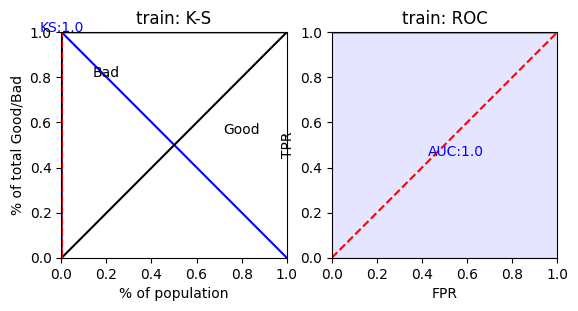

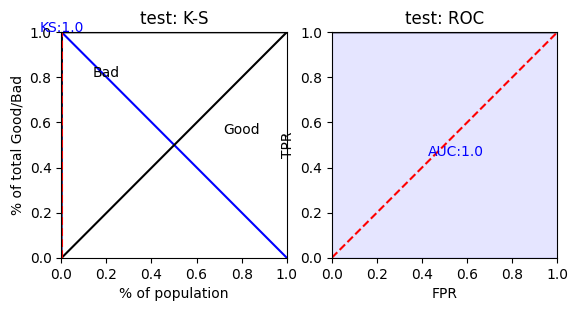

In [126]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve

predictions = lr.predict(X_test)

print('Accuracy')
print(accuracy_score(y_test, predictions))
print('AUC Score')
print(roc_auc_score(y_test, predictions))

Accuracy
0.9999651555803338
AUC Score
0.9913793103448276


In [128]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28641
           1       1.00      0.98      0.99        58

    accuracy                           1.00     28699
   macro avg       1.00      0.99      1.00     28699
weighted avg       1.00      1.00      1.00     28699



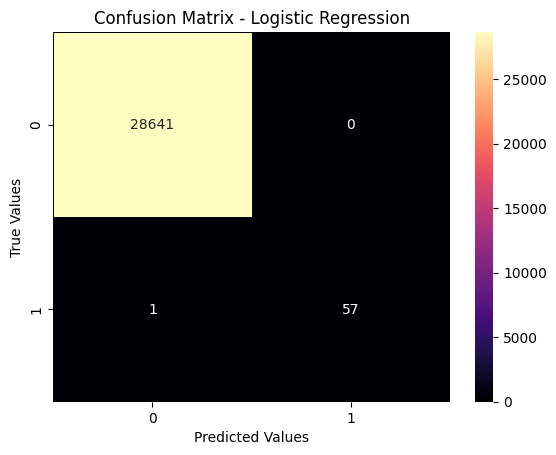

In [131]:
conf_log2 = confusion_matrix(y_test,predictions)
sns.heatmap(data=conf_log2, annot=True, linewidth=0.7, linecolor='k', fmt='.0f', cmap='magma')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix - Logistic Regression');